In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def demo_f(x):
    return 10*math.pow(x,3)
class fx:
    def __init__(self, n, reg=100):
        self.count = 0
        self.dim = n
        self.A = []
        self.B = []
        self.coeff = [0]*n
        self.reg = reg
    
    def fit(self, x, y):
        if self.count < self.reg:
            self.A.append([x**i for i in range(1, self.dim)])
            self.B.append(y)
            self.count += 1
        else:
            X_train, X_test, y_train, y_test = train_test_split(self.A, self.B, test_size=0.3)
            regressor = LinearRegression().fit(X_train, y_train)
            self.coeff[0] = (regressor.intercept_ + self.coeff[0]) / 2
            self.coeff[1:] = [(self.coeff[1:][i]+regressor.coef_[i])/2 
                              for i in range(len(regressor.coef_))]
            self.A, self.B = [], []
            self.count = 0

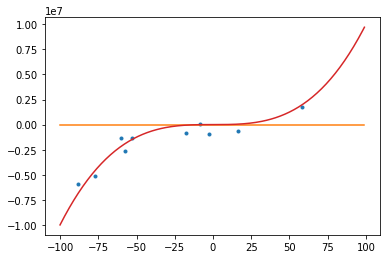

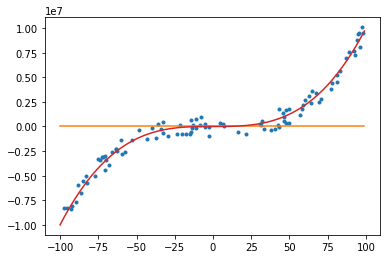

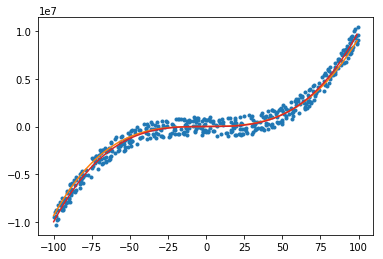

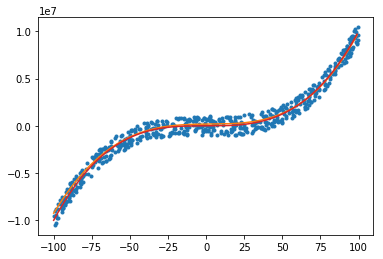

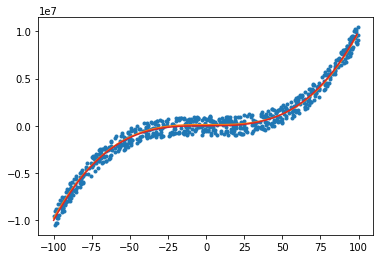

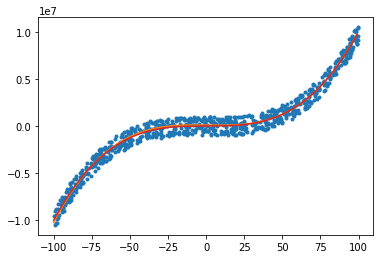

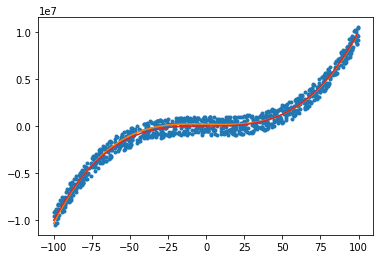

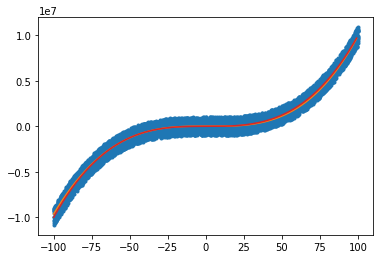

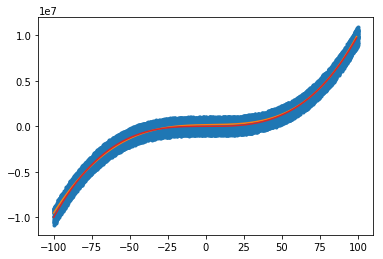

In [16]:
n = 5
points_x = np.array([])
points_y = np.array([])
f = fx(n)
for i in range(10000):
    if i in [10, 100, 500, 600, 700,800,1000, 5000, 9999]:
        plt.plot(points_x, points_y, ".")
        func = lambda x: sum(f.coeff[i]*math.pow(x,i) for i in range(n))
        func = np.vectorize(func)
        plt.plot(np.arange(-100,100),func(np.arange(-100,100)), 0.01)
        plt.plot(np.arange(-100,100),(np.vectorize(demo_f))(np.arange(-100,100)), 0.01)
        plt.show()
    else:
        x = random.uniform(-100, 100)
        y = demo_f(x) + random.randint(-1000000,1000000)
        f.fit(x, y)
        points_x = np.append(points_x, x)
        points_y = np.append(points_y, y)